<a href="https://colab.research.google.com/github/NickSalA/Quimica/blob/Actividades/Actividad_Cin%C3%A9tica_qu%C3%ADmica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
! pip install rdkit
! pip install pyscf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 MB 11.4 MB/s eta 0:00:00


In [6]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True






---



# Molecula cis

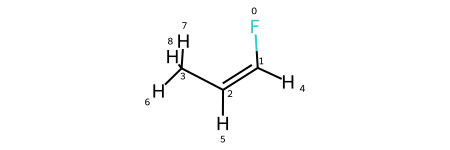

In [24]:
smiles = "F\C=C/C"
molCis = Chem.MolFromSmiles(smiles)
molCis = Chem.AddHs(molCis)
Chem.AllChem.EmbedMolecule(molCis,useRandomCoords=False, randomSeed = 125)
Chem.MolToXYZFile(molCis,"cis.xyz")
molCis

In [25]:
cat cis.xyz

9

F      1.255945    1.451950   -0.247875
C      1.339305    0.126604   -0.018776
C      0.229115   -0.576666    0.097290
C     -1.096846    0.112555   -0.027970
H      2.311299   -0.322108    0.063260
H      0.222426   -1.651719    0.282755
H     -1.833423   -0.611591   -0.421633
H     -1.038583    0.982059   -0.702864
H     -1.389239    0.488916    0.975813


In [26]:
from pyscf import gto, scf

In [16]:
molCis1 = gto.M(atom="cis.xyz")

In [27]:
# set basis set
molCis1.basis = "3-21G"

# set the functional
mf = molCis1.KS()
mf.xc = 'b3lyp'

In [28]:
mf.kernel()

converged SCF energy = -214.251990680735


-214.25199068073454



---



# Molecula trans

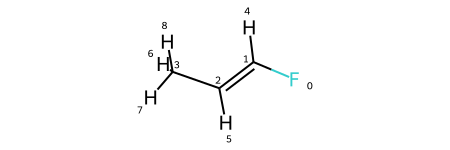

In [22]:
smiles = "F/C=C/C"
molTrans = Chem.MolFromSmiles(smiles)
molTrans = Chem.AddHs(molTrans)
Chem.AllChem.EmbedMolecule(molTrans,useRandomCoords=False, randomSeed = 130)
Chem.MolToXYZFile(molTrans,"trans.xyz")
molTrans

In [23]:
cat trans.xyz

9

F      2.542526   -0.199960   -0.026375
C      1.295997    0.323463    0.076392
C      0.259343   -0.468704   -0.090111
C     -1.152143    0.026046    0.006141
H      1.166243    1.374419    0.291633
H      0.457449   -1.513645   -0.303860
H     -1.437386    0.265507    1.052684
H     -1.818606   -0.748524   -0.414945
H     -1.313423    0.941398   -0.591560


In [30]:
molTrans1 = gto.M(atom = "trans.xyz")
molTrans1.basis = "3.21G"
mf1 = molTrans1.KS()
mf1.xc = 'b3lyp'

In [31]:
mf1.kernel()

converged SCF energy = -214.252316312389


-214.25231631238893

# Molecula Cis rotada(90°)

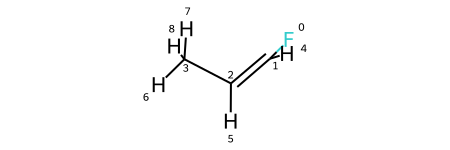

In [33]:
Chem.AllChem.SetDihedralDeg(molCis.GetConformer(0),3,2,1,0,90.0)
Chem.MolToXYZFile(molCis, "90.xyz")
molCis

In [34]:
cat 90.xyz

9

F      1.886210    0.676678    1.083172
C      1.339305    0.126604   -0.018776
C      0.229115   -0.576666    0.097290
C     -1.096846    0.112555   -0.027970
H      1.824492    0.276708   -0.964771
H      0.222426   -1.651719    0.282755
H     -1.833423   -0.611591   -0.421633
H     -1.038583    0.982059   -0.702864
H     -1.389239    0.488916    0.975813


In [35]:
mol_90 = gto.M(atom = "90.xyz")
mol_90.basis = "3-21G"
mf2 = mol_90.KS()
mf2.xc = 'b3lyp'

In [36]:
mf2.kernel()

converged SCF energy = -214.088044019753


-214.0880440197531



---



# Grafico de la energía

In [38]:
pip install git+https://github.com/giacomomarchioro/PyEnergyDiagrams

  Cloning https://github.com/giacomomarchioro/PyEnergyDiagrams to /tmp/pip-req-build-s77h1980
  Running command git clone --filter=blob:none --quiet https://github.com/giacomomarchioro/PyEnergyDiagrams /tmp/pip-req-build-s77h1980
  Resolved https://github.com/giacomomarchioro/PyEnergyDiagrams to commit 3d6086564aa99aa0a0f3db4a510b736015562d5c
  Preparing metadata (setup.py) ... done
  Created wheel for energydiagram: filename=energydiagram-0.2.0-py3-none-any.whl size=9466 sha256=aa8fa158fff6b049d1a29d9ad00155c51f29b3512f6b0eafebb3c186ac0c64a5
  Stored in directory: /tmp/pip-ephem-wheel-cache-eqo419f4/wheels/fd/36/8c/10ed87cd41f9638b1e3a44dabe7e1e185131d967ea6ed395cf
Successfully built energydiagram


converged SCF energy = -214.251990680734
converged SCF energy = -214.088044019753
converged SCF energy = -214.252316312389


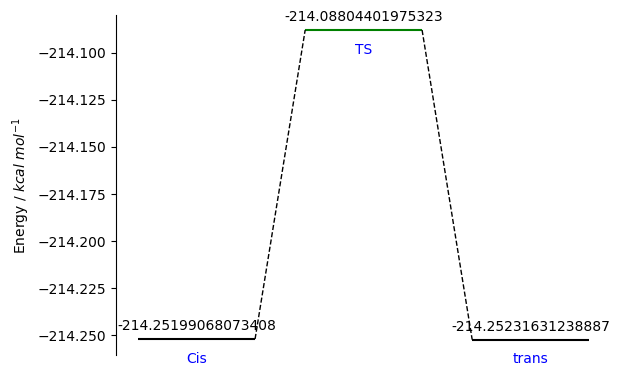

In [40]:
import matplotlib.pyplot as plt
from energydiagram import ED
diagram = ED()
diagram.add_level(mf.kernel(),'Cis')
diagram.add_level(mf2.kernel(),'TS',color='g')
diagram.add_level(mf1.kernel(),'trans')

diagram.add_link(0,1)
diagram.add_link(1,2)
diagram.plot(ylabel="Energy / $kcal$ $mol^{-1}$") # this is the default ylabel


# ¿Reacción endotérmica o exotérmica?

In [45]:
Ereactante = mf.kernel()

converged SCF energy = -214.251990680734


In [43]:
Eproducto = mf1.kernel()

converged SCF energy = -214.252316312389


In [46]:
Eentalpia = Eproducto - Ereactante
Eentalpia

-0.0003256316545048321

- Ya que la energiá de entalpia resulta ser *positiva*, la reacción es *Exotermica*.